# Exercício de classe 2 (18/09/2023)

SEL0367 - Controle Adaptativo

> Aluno: Felipe Andrade Garcia Tommaselli- 11800910 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import control.matlab as matlab

Sistema: 
$y_{(k+2)} = a_1 \cdot y_k + a_2 \cdot y_{k-1} + b_1 \cdot u_{k+1} + 0.2 \cdot u_{k-1}$


In [2]:
# Parametros
a1 = 3
a2 = -2
b1 = 4

In [3]:
# Parâmetros de simulação
N = 500
dt = 0.1  # Taxa de amostragem
T = np.arange(0, N + dt, dt)
u = np.ones(len(T) + 2) # entrada

y = [0, 0]
z = [0]
phi1 = [0]
phi2 = [0]
phi3 = [0]

# add 2 more values in T at the end
T = np.append(T, [T[-1] + dt, T[-1] + 2 * dt])
len(T)

5003

/tmp/ipykernel_17994/4273435866.py:4: RuntimeWarning: overflow encountered in scalar multiply
  y.append(a1 * y[k] + a2 * y[k-1] + b1 * u[k+1] + 0.2 * u[k - 1])
/tmp/ipykernel_17994/4273435866.py:4: RuntimeWarning: invalid value encountered in scalar add
  y.append(a1 * y[k] + a2 * y[k-1] + b1 * u[k+1] + 0.2 * u[k - 1])


ValueError: x and y must have same first dimension, but have shapes (5003,) and (5001,)

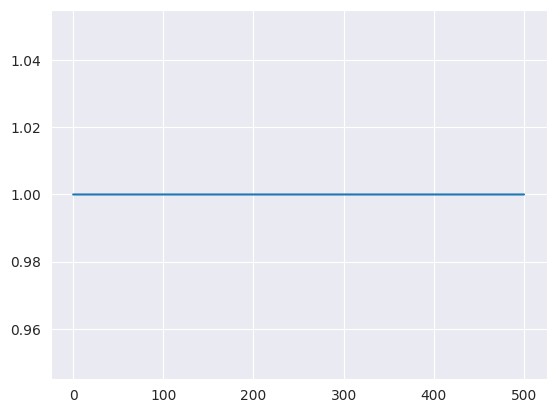

In [4]:
# Simulação dos modelos
for k in range(1, int(N/dt)):
    try: 
        y.append(a1 * y[k] + a2 * y[k-1] + b1 * u[k+1] + 0.2 * u[k - 1])
        y.append(y[k+2] - 0.2 * u[k-1])
    except:
        pass
    phi1.append(y[k])
    phi2.append(y[k-1])
    phi3.append(u[k+1])



# Plotagem dos resultados juntos
corte = int(np.ceil(len(T) + 2))
plt.plot(T[:corte], u[:corte], label='Entrada')
plt.plot(T[:corte], y[:corte], label='FT p/ z')
plt.plot(T[:corte], phi1[:corte], label='FT p/ phi 1')
plt.plot(T[:corte], phi2[:corte], label='FT p/ phi 2')
plt.plot(T[:corte], phi3[:corte], label='FT p/ phi 3')

plt.legend()
plt.show()

In [ ]:
theta = np.zeros((2, int(N/dt) + 1))  # Matriz para armazenar os parâmetros estimados
theta[:, 0] = [0, 0]
erro = np.zeros(int(N/dt) + 1)  # Vetor de erros

gama = np.array([[10, 0], [0, 1]])  # Matriz de ajuste

In [ ]:
# Loop de iterações para o algoritmo adaptativo
for k in range(0, int(N/dt)): 
    # Construção do vetor phi
    phi = np.array([[phi1[k]], [phi2[k]]])
    
    # Cálculo de ms (fator de ajuste)
    ms = 1 + 0.1 * np.dot(phi.T, phi)[0, 0]

    # Atualização dos parâmetros estimados usando o algoritmo adaptativo
    erro[k+1] = (z[k] - np.dot(theta[:, k].T, phi))[0] / ms
    delta_theta = (dt * np.dot(gama, erro[k+1] * phi) / ms).reshape((2,))
    theta[:, k+1] = theta[:, k] + delta_theta

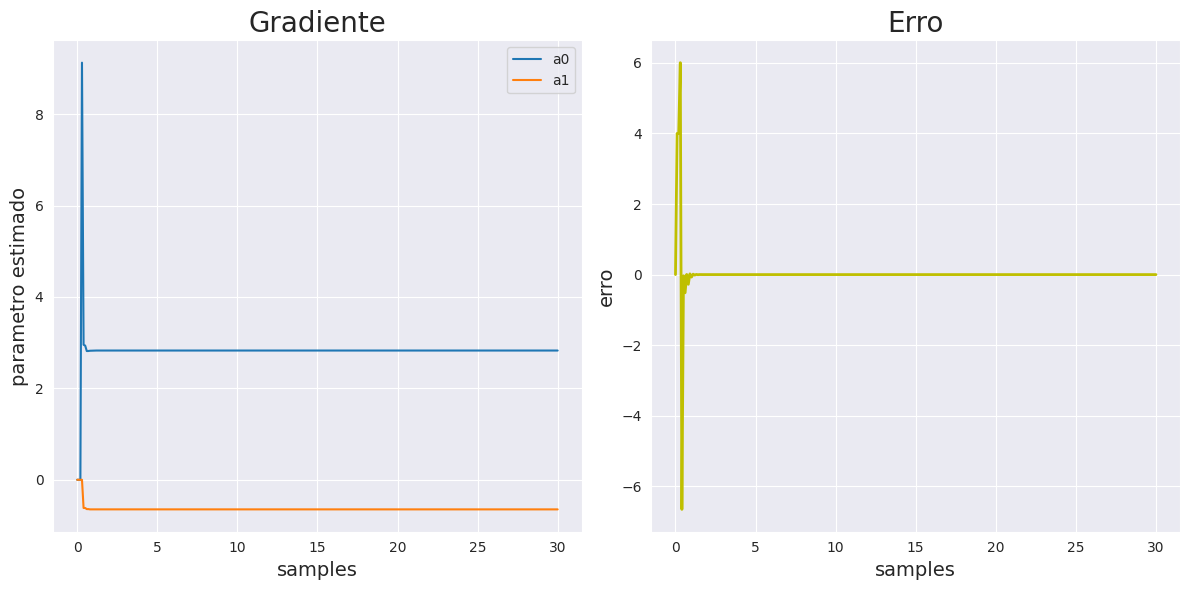

In [ ]:
# Gráfico dos parâmetros identificados e do erro

# Crie uma figura com 1 linha e 2 colunas para os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

corte = int(np.ceil(0.3*len(theta[0])))

fontesize = 14
titlesize = 20
# Primeiro subplot (Gráfico dos parâmetros estimados)
axs[0].plot(T[:corte], theta[0, :][:corte], label='a0')
axs[0].plot(T[:corte], theta[1, :][:corte], label='a1')
axs[0].legend()
axs[0].set_xlabel('samples', fontsize=fontesize)
axs[0].set_ylabel('parametro estimado', fontsize=fontesize)
axs[0].set_title('Gradiente', fontsize=titlesize)

# Segundo subplot (Gráfico do erro)
axs[1].plot(T[:corte], erro[:corte], 'y', linewidth=2)
axs[1].set_xlabel('samples', fontsize=fontesize)
axs[1].set_ylabel('erro', fontsize=fontesize)
axs[1].set_title('Erro', fontsize=titlesize)
axs[1].grid(True)

# Ajuste o espaço entre os subplots
plt.tight_layout()

# Exiba os subplots lado a lado
plt.show()